# **Question 7**

In [ ]:
from numpy.random import rand
from numpy.random import randn

import numpy as np

from numpy import hstack
from numpy import zeros
from numpy import ones

from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from scipy.special import expit as sigmoid

from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from keras import backend as k
from keras import losses

In [ ]:
def loss_stable(z,t,N):
  return (1./N) * np.sum(t*np.logaddexp(0,-z) + (1-t)*np.logaddexp(0,z))

In [ ]:
def drelu(z):
  z[z<=0] = 0
  z[z>0] = 1
  return z

# **Dataset**

In [ ]:
# generate real randoms sample from x^2
def generate_real_samples(n=100):
	# generate random inputs in [-0.5, 0.5]
	X1 = rand(n) - 0.5
	# generate outputs X^2 (quadratic)
	X2 = X1 * X1
	# stack arrays
	X1 = X1.reshape(n, 1)
	X2 = X2.reshape(n, 1)
	X = hstack((X1, X2))
 	# generate class labels
	y = ones(n)
	return X, y

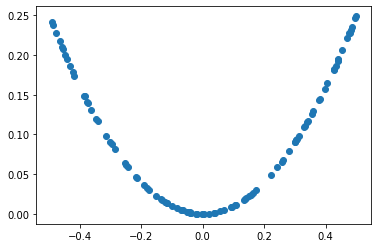

(100, 2)


In [ ]:
# generate samples
data , y = generate_real_samples()
# plot samples
pyplot.scatter(data[:, 0], data[:, 1])
pyplot.show()
print(data.shape)


# Discriminator model

In [ ]:
def forward_dis(X,U,b,W,c):    
    G = np.dot(X, U.T)  + b
    H = G* (G>0)
    z = np.dot(H,W.T) + c
    y = sigmoid(z)
    
    return y,z,H,G

# Generator model

In [ ]:
def forward_gen(X,U,b,W,c):    
    G = np.dot(X, U.T)  + b
    H = G* (G>0)
    y = np.dot(H,W.T) + c
    
    return y,H,G

# Discriminator Backpropagation

In [ ]:
def grad_decent_dis(x,t,U,b,W,c):
  N=x.shape[0]
  #U = np.random.randn(25,2)
  #b = np.zeros(25)
  #W = np.random.randn(25)
  #c = 0
  #num_steps = 50000
  alpha = 0.01
  #thresh=0.02
  #for step in range(num_steps):
  y,z,H,G = forward_dis(x,U,b,W,c)
  l= loss_stable(z,t,N)
  #if (l<thresh):
    #print('converged at step: ',step)
    #break
    #if (step % 1000==0):
      #print (step,' loss = ',l)

  E_bar = 1
  z_bar = (1./N) * (y - t)
  #y_bar = (1./N) * (y.T - t)
  #z_bar = y_bar * (y.T*(1-y.T))
  W_bar = np.dot(H.T,z_bar)
  c_bar = np.dot(z_bar, np.ones(N))
  H_bar = np.outer(z_bar, W.T )
  G_bar = H_bar * drelu(G)
  U_bar = np.dot(G_bar.T, x)
  b_bar = np.dot(G_bar.T , np.ones(N))
  
  U -= alpha * U_bar
  b -= alpha * b_bar
  W -= alpha * W_bar
  c -= alpha * c_bar
  
  return U,b,W,c,l

# Generator data generation

In [ ]:
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n):
	# generate points in the latent space
	x_input = randn(latent_dim * n)
	# reshape into a batch of inputs for the network
	x_input = x_input.reshape(n, latent_dim)
	return x_input

In [ ]:
def generate_fake_samples_gen(latent_dim, n, U,b,W,c):
	# generate points in latent space
	x_input = generate_latent_points(latent_dim, n)
	# predict outputs
	X,H,G = forward_gen(x_input,U,b,W,c)
	# create class labels
	y = zeros(n)
	return X, y, H,G,x_input

# Generator Backpropagation

In [ ]:
def grad_decent_gen(t,U,b,W,c,Ug,bg,Wg,cg,latent_dim,n):
  x,_,Hg,Gg, latent_x= generate_fake_samples_gen(latent_dim, n, Ug,bg,Wg,cg)
  N=x.shape[0]
  #U = np.random.randn(25,2)
  #b = np.zeros(25)
  #W = np.random.randn(25)
  #c = 0
  #num_steps = 50000
  alpha = 0.001
  #thresh=0.02
  #for step in range(num_steps):
  y,z,H,G = forward_dis(x,U,b,W,c)
  l= loss_stable(z,t,N)
  #if (l<thresh):
    #print('converged at step: ',step)
    #break
    #if (step % 1000==0):
      #print (step,' loss = ',l)

  z_bar = (1./N) * (y - t)
  H_bar = np.outer(z_bar, W.T )
  G_bar = H_bar * drelu(G)
  x_bar = np.dot(G_bar,U)
  z_bar = x_bar
  W_bar = np.dot(z_bar.T,Hg)
  c_bar = np.dot(np.ones(N),z_bar)
  H_bar = np.dot(z_bar, Wg )
  G_bar = H_bar * drelu(Gg)
  U_bar = np.dot(G_bar.T, latent_x)
  b_bar = np.dot(G_bar.T , np.ones(N))
  
  Ug -= alpha * U_bar
  bg -= alpha * b_bar
  Wg -= alpha * W_bar
  cg -= alpha * c_bar
  
  return Ug,bg,Wg,cg,l

# Final GAN model and training

Discriminator loss real 0 : 0.4747555792634539
Discriminator loss fake 0 : 33.52022145779241
Generator loss 0 : 0.0009854603279658707


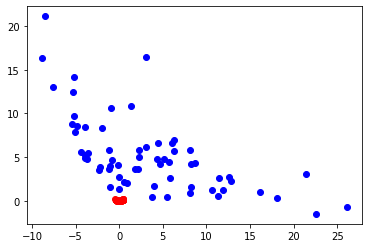

Discriminator loss real 4000 : 0.6742679308560113
Discriminator loss fake 4000 : 0.6622314971280567
Generator loss 4000 : 0.7711444227533917


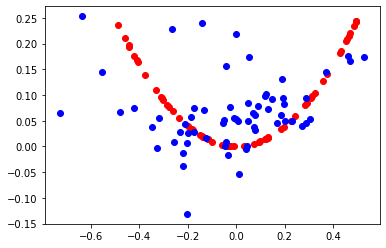

Discriminator loss real 8000 : 0.6719639277806612
Discriminator loss fake 8000 : 0.6901468099080383
Generator loss 8000 : 0.7899212772449655


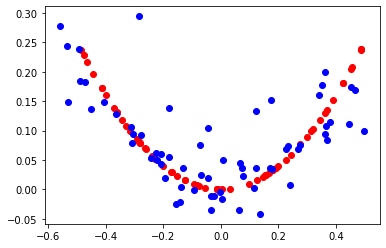

Discriminator loss real 12000 : 0.7074233669054396
Discriminator loss fake 12000 : 0.7004637099317828
Generator loss 12000 : 0.7304616141340543


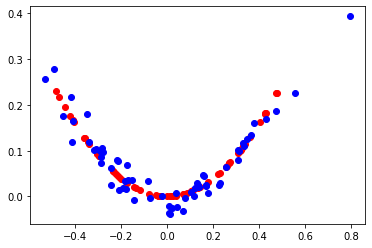

Discriminator loss real 16000 : 0.7022284859361609
Discriminator loss fake 16000 : 0.7034814613068479
Generator loss 16000 : 0.7128372253233979


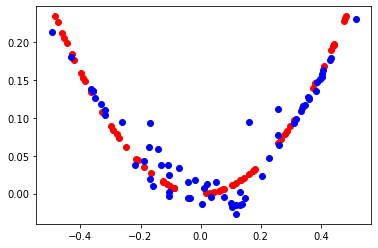

Discriminator loss real 20000 : 0.7072081649916047
Discriminator loss fake 20000 : 0.6987434467645222
Generator loss 20000 : 0.7161312557414106


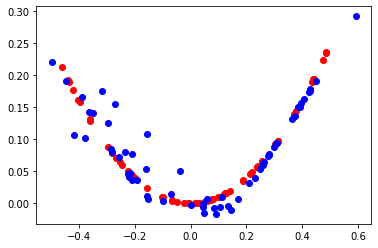

In [ ]:
n_epochs=20001
n_batch=128
l=0
latent_dim = 5 

U = np.random.randn(25,2)
b = np.zeros(25)
W = np.random.randn(25)
c = 0

Ug = np.random.randn(15,5)
bg = np.zeros(15)
Wg = np.random.randn(2,15)
cg = np.zeros(2)


for i in range(n_epochs):
  # generate real examples
  X_real, y_real = generate_real_samples(half_batch)
  # update discriminator model
  U,b,W,c,l=grad_decent_dis(X_real,y_real,U,b,W,c)
  if (i%4000==0):
    print('Discriminator loss real',i,':',l)
  # generate fake examples
  X_fake, y_fake,Hg,Gg,latent_x = generate_fake_samples_gen(latent_dim,half_batch,Ug,bg,Wg,cg)
  # update discriminator model
  U,b,W,c,l=grad_decent_dis(X_fake,y_fake,U,b,W,c)
  if (i%4000==0):
    print('Discriminator loss fake',i,':',l)
  #train the generator model
  Ug,bg,Wg,cg,l = grad_decent_gen(np.ones(n_batch),U,b,W,c,Ug,bg,Wg,cg,latent_dim,n_batch)
  if (i%4000==0):
    print('Generator loss',i,':',l)
    pyplot.scatter(X_real[:, 0], X_real[:, 1], color='red')
    pyplot.scatter(X_fake[:, 0], X_fake[:, 1], color='blue')
    pyplot.show()







**We can see as we train the generator gets more competent in producing data that resembles the dataset**